In [1]:
from caik import cai
import skrf as rf
%matplotlib inline
key = cai.CAI(start = True, resolution = 20)

# Beam Test
### After OAP Mirror

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20


[[6.3e-07,
  4.8e-07,
  4.5e-07,
  5.5e-07,
  3.3e-07,
  4.8e-07,
  6.8e-07,
  6.3e-07,
  5e-07,
  5.3e-07,
  4.5e-07,
  4.8e-07,
  6.5e-07,
  4.5e-07,
  2.8e-07,
  3.3e-07,
  3.8e-07,
  4.5e-07,
  7.3e-07,
  5e-07],
 [5.5e-07,
  4.3e-07,
  3e-07,
  4.3e-07,
  5.5e-07,
  5.5e-07,
  4.5e-07,
  6.3e-07,
  4.5e-07,
  3.3e-07,
  3.8e-07,
  5e-07,
  5.3e-07,
  4e-07,
  5e-07,
  5.5e-07,
  4.5e-07,
  4.5e-07,
  2e-07,
  3.3e-07],
 [5.5e-07,
  6.3e-07,
  7.3e-07,
  6.3e-07,
  6.3e-07,
  6.5e-07,
  6.3e-07,
  6.3e-07,
  4.5e-07,
  4.8e-07,
  4.5e-07,
  4.8e-07,
  6e-07,
  5.3e-07,
  4.5e-07,
  3.3e-07,
  3.3e-07,
  4e-07,
  5e-07,
  4.5e-07],
 [5e-07,
  7.8e-07,
  5.5e-07,
  6.3e-07,
  7.5e-07,
  8e-07,
  4.5e-07,
  5.5e-07,
  4.5e-07,
  5.3e-07,
  6.3e-07,
  6.8e-07,
  5e-07,
  5e-07,
  5.5e-07,
  5.3e-07,
  5.5e-07,
  4.5e-07,
  4e-07,
  6e-07],
 [7.5e-07,
  6e-07,
  7.3e-07,
  5e-07,
  4e-07,
  5e-07,
  5.5e-07,
  4.8e-07,
  6.3e-07,
  4.8e-07,
  5.5e-07,
  3e-07,
  4.8e-07,
  5.5e-07,
  5.

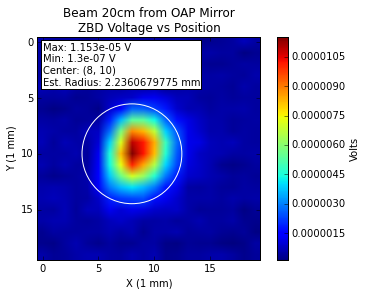

In [3]:
key.schottky_pic('Beam 20cm from OAP Mirror', step = 1)

# Planar Mirror Calibration

In [8]:
key.esp.current_axis = 2

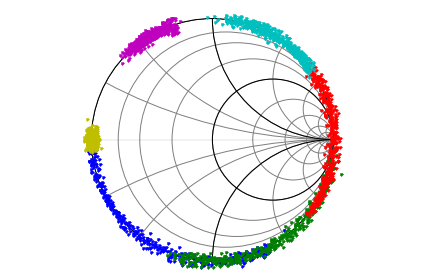

In [10]:
mirror_cal = key.take_simple_cal()

In [25]:
mirror_cal.run()

In [26]:
import skrf as rf

In [47]:
key.zva.write_data('mirror_ntwk')

In [48]:
dut = rf.Network('mirror_ntwk.s1p')
dut_caled = mirror_cal.apply_cal(dut)
dut_caled.name = dut.name + ' corrected'

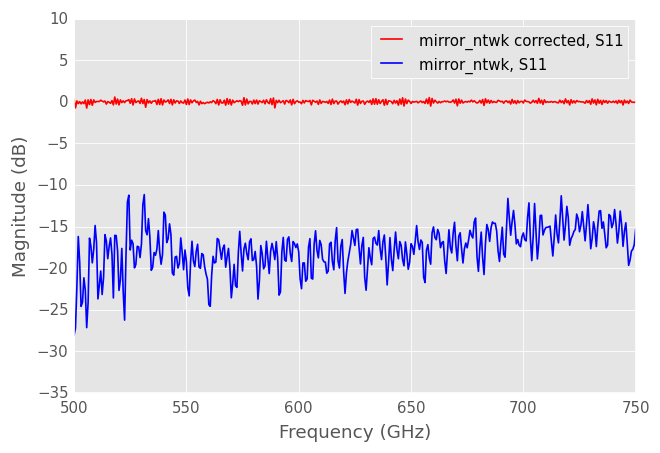

In [65]:
dut_caled.plot_s_db(color = 'r')
dut.plot_s_db(color = 'b')
rf.stylely()

# ITO Characterization
### Reflection compared to planar mirror

In [73]:
key.zva.write_data('ito_ntwk')

In [74]:
ito = rf.Network('ito_ntwk.s1p')
ito_caled = mirror_cal.apply_cal(ito)
ito_caled.name = ito.name + ' corrected'

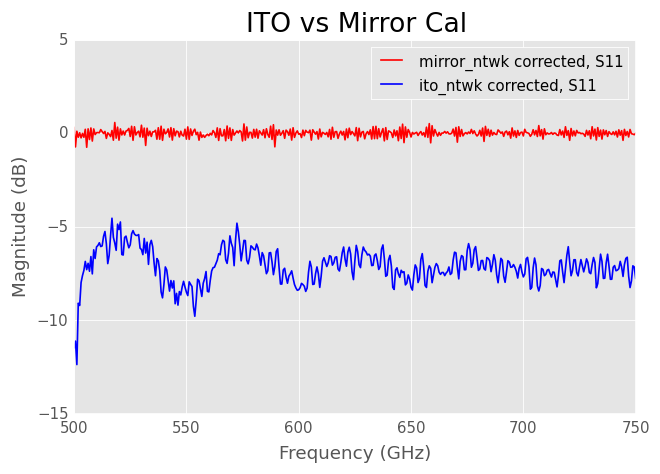

In [75]:
dut_caled.plot_s_db(color = 'r', title = 'ITO vs Mirror Cal')
ito_caled.plot_s_db(color = 'b')
rf.stylely()

# Trial 2

In [2]:
key.esp.current_axis = 2

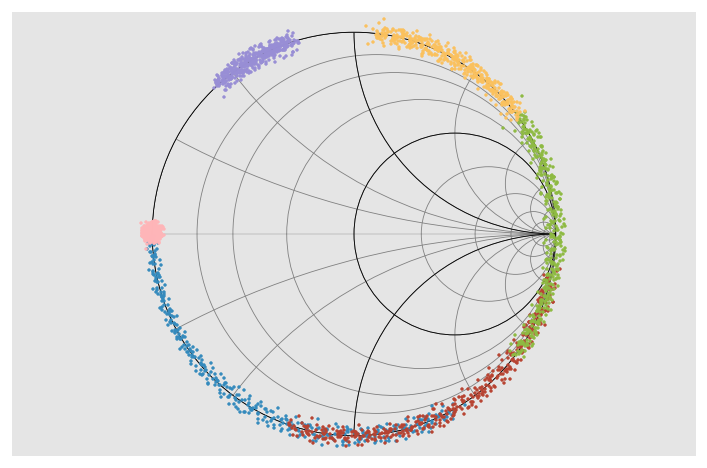

In [11]:
mirror_cal_2 = key.take_simple_cal()

In [12]:
key.zva.write_data('mirror_ntwk_trial_2')

In [13]:
dut2 = rf.Network('mirror_ntwk_trial_2.s1p')
dut_caled2 = mirror_cal_2.apply_cal(dut2)
dut_caled2.name = dut2.name + ' corrected'

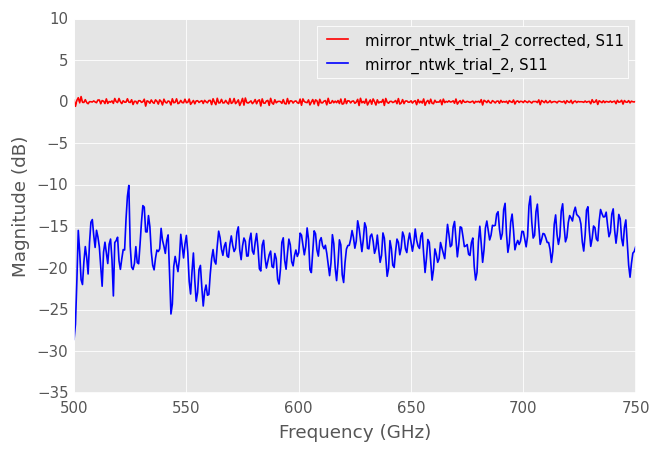

In [15]:
dut_caled2.plot_s_db(color = 'r')
dut2.plot_s_db(color = 'b')

# ITO Characterization
### Part 2

In [21]:
key.zva.write_data('ito_ntwk_2')

In [22]:
ito2 = rf.Network('ito_ntwk_2.s1p')
ito_caled2 = mirror_cal_2.apply_cal(ito2)
ito_caled2.name = ito2.name + ' corrected'

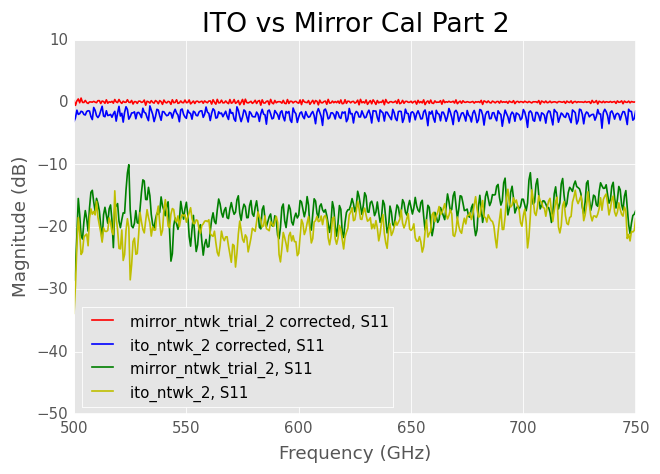

In [26]:
dut_caled2.plot_s_db(color = 'r', title = 'ITO vs Mirror Cal Part 2')
ito_caled2.plot_s_db(color = 'b')
rf.stylely()
dut2.plot_s_db(color = 'g')
ito2.plot_s_db(color = 'y')

# Summary
With rotational stages and greater overall positioning, trial 2 shows what we expect: The ITO has a small amount of attenuation compared to a perfect short (planar mirror) but has reflection properties independent of frequency in this band.